## Desenvolvendo um classificador capaz de analisar se um comentário traz uma mensagem positiva ou negativa

link:https://www.kaggle.com/luisfredgs/imdb-ptbr?select=imdb-reviews-pt-br.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install wordcloud

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [2]:
import pandas as pd
import nltk
from nltk import tokenize

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/NLP/analise_de_sentimento/imdb-reviews-pt-br.csv')

In [4]:
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


- Criando uma coluna numérica para representar a coluna **sentiment**

In [5]:
dados.sentiment.value_counts(normalize=True)

neg    0.500718
pos    0.499282
Name: sentiment, dtype: float64

In [6]:
dados['classificacao'] = dados['sentiment'].apply(lambda x: 1 if x=='pos' else 0)

In [7]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Pré-processamento 

Criar um a nova coluna com os dados do texto já tratados, contendo apenas palavras chaves
 
- Tokenização
- Removendo palavras

In [94]:
# lista com palavras irrelevantes
stop_words = nltk.corpus.stopwords.words('portuguese')

# tokenização
frase_processada=[]
for opiniao in dados.text_pt:
  nova_frase=[]
  tokens = token_espaco.tokenize(opiniao)
  tokens = [token.lower() for token in tokens]
  for palavra in tokens:
    if palavra not in stop_words:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase)) 


# criando coluna com a frase sem palavras irrelevantes

dados['tratamento_1'] = frase_processada

In [96]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"vez, sr. costner arrumou filme tempo necessári..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes ação mesmos. gen...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"filmes fotos latão palavra apropriada eles, ve..."


- Calculando a frêquencia das palavras na coluna original e na coluna tratada

In [101]:
# unindo todas as palavras em uma unica lista
todas_palavras_col_original = ' '.join([texto for texto in dados.text_pt])

todas_palavras_col_tratada = ' '.join([texto for texto in dados.tratamento_1])


def tokenizacao(texto):
  lista_de_palavras=[]
  lista_tokens = nltk.tokenize.word_tokenize(texto)
  lista_de_tokens = [palavra.lower() for palavra in lista_tokens]
  for token in lista_de_tokens:
    if token.isalpha():
      lista_de_palavras.append(token)

  return lista_de_palavras

# calculando a frequência das palavras

palavras_orignais = tokenizacao(todas_palavras_col_original)
palavras_tratadas = tokenizacao(todas_palavras_col_tratada)


frequencia_original = nltk.FreqDist(palavras_orignais)
frequencia_tratada = nltk.FreqDist(palavras_tratadas)

[('de', 422582), ('que', 332129), ('e', 319738), ('o', 291697), ('a', 242921), ('um', 226652), ('é', 212173), ('filme', 153086), ('não', 145968), ('em', 140478)]
[('filme', 153086), ('ser', 34120), ('filmes', 32431), ('sobre', 29009), ('tão', 25216), ('realmente', 24838), ('apenas', 23863), ('história', 23821), ('bem', 21882), ('todos', 21586)]


In [106]:
df_frequencia_palavras = pd.DataFrame({'Palavra_original':frequencia_original.keys(),'Frequencia_normal':frequencia_original.values()})
df_frequencia_palavras_tratadas = pd.DataFrame({'Palavra_tratada':frequencia_tratada.keys(),'Frequencia_tratada':frequencia_tratada.values()})

In [110]:

display(df_frequencia_palavras.nlargest(columns='Frequencia_normal',n=10),df_frequencia_palavras_tratadas.nlargest(columns='Frequencia_tratada',n=10))


,Palavra_original,Frequencia_normal
18,de,422582
12,que,332129
40,e,319738
3,o,291697
34,a,242921
6,um,226652
43,é,212173
7,filme,153086
27,não,145968
178,em,140478


,Palavra_tratada,Frequencia_tratada
3,filme,153086
60,ser,34120
74,filmes,32431
56,sobre,29009
209,tão,25216
151,realmente,24838
355,apenas,23863
423,história,23821
52,bem,21882
133,todos,21586


## Vetorizando um texto

- Bag of words
- Criando uma matriz representativa com as palavras.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texto = ['Assisti um ótimo filme','Vi a um filme muito ruim']


vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
vetorizar.get_feature_names()

['Assisti', 'Vi', 'filme', 'muito', 'ruim', 'um', 'ótimo']

In [ ]:
# criando umdataframe com as palavras

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names())

In [ ]:
matriz_esparsa

,Assisti,Vi,filme,muito,ruim,um,ótimo
0,1,0,1,0,0,1,1
1,0,1,1,1,1,1,0


In [ ]:
print(bag_of_words.shape)

(2, 7)


In [ ]:
#  criando a matriz esparsa com os dados do dataset
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(dados.text_pt)
print(bag_of_words.shape)

(49459, 50)


## Aplicando  Machine learning para classificação de textos

- Divisão em treino e teste
- Treinando um modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divisão treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words,dados.classificacao, random_state=42, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_treino,y_treino)
acuracia = lr.score(X_teste,y_teste)

print(f' A acurácia foi de {acuracia}')

 A acurácia foi de 0.6582423507211215


## Gerando insights 
- Plotando uma nuvem de palavras 

In [ ]:
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
# unindo todas as palavras em uma unica lista
todas_palavras = ' '.join([texto for texto in dados.text_pt])

In [ ]:
# gerando a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=500,
                          max_font_size=110,collocations=True).generate(todas_palavras)

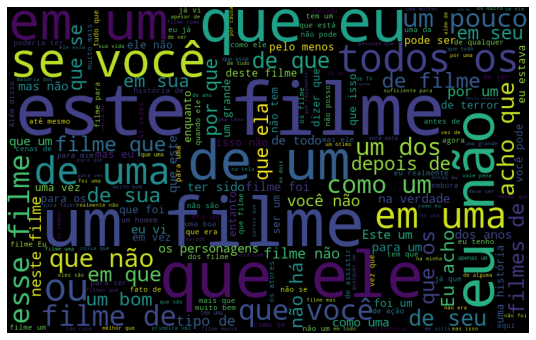

In [ ]:
# plotando a nuvem de palavras

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

Analisnado com **textblob**

In [ ]:
from textblob import TextBlob

In [ ]:
def sentimento(frase):
    tb = TextBlob(frase)
    tb_en = tb.translate(to='en')
    polaridade = tb_en.sentiment.polarity
    return polaridade

In [ ]:
# dados['analise_sentimentos'] = dados.text_pt.apply(sentimento)

In [ ]:
dados.text_pt[:10].apply(sentimento)

0    0.023333
1   -0.002582
2   -0.147093
3    0.070000
4    0.100450
5   -0.058869
6   -0.155417
7   -0.045635
8   -0.008333
9    0.111514
Name: text_pt, dtype: float64

In [ ]:
dados.text_pt[9]

'Fazendeiros ricos em Buenos Aires têm uma longa política de não-comércio com os Crawford de Manhattan, mas o que acontece quando o filho latino de bigode cai por um certo Crawford com olhos brilhantes, cabelos loiros e alguns movimentos alegres na pista de dança? O musical da 20th Century-Fox tem um verniz brilhante, mas parece um pouco ultrapassado nas bordas. É muito pesado na dança frenética, como ginástica, extremamente fina na história. Betty Grable, uma substituta de décima primeira hora de Alice Faye, dá um impulso, apesar de ela estar emparelhada com Don Ameche, de pele castanha e magricela. Também é bom: Charlotte Greenwood como Bettys tia, uma motorista de limusine que constantemente adormece no trabalho, e Carmen Miranda interpretando quem mais ?. As filmagens de ações da Argentina superam de longe a ação filmada no backlot da Fox, e algumas das performances de apoio são bastante terríveis. Até o final do grande final de corrida de cavalos, a maioria dos espectadores terá o